In [49]:
import os
import logging, timeit
#from btEngine2.DataLoader import DataLoader
from btEngine2.MarketData import MarketData
from btEngine2.TradingRule import TradingRule
from btEngine2.Indicators import *


import matplotlib.pyplot as plt


import platform

# Detect operating system
if platform.system() == "Windows":
    ticker_csv_path = r'G:\Projects\BackTesting1.0\Data\Inputs\TickerList-Futs.csv'
    save_directory = r"G:\Projects\BackTesting1.0\Data\Bloomberg\Futures"
    helper_directory = r'G:\Projects\BackTesting1.0\Data\Bloomberg\HelperFiles'
    bt_folder = r'BackTests\ratioRSI_resrch'
else:  # Assume macOS for other cases
    ticker_csv_path = r'Data/Inputs/TickerList-Futs.csv'
    save_directory = r"Data/Bloomberg/Futures"
    helper_directory = r'Data/Bloomberg/HelperFiles'
    bt_folder = r'BackTests/ratioRSI_resrch'

# Define paths to auxiliary data for MarketData
tick_values_path = os.path.join(helper_directory, 'fut_val_pt.parquet')
fx_rates_path = os.path.join(helper_directory, 'fxHist.parquet')

# Initialize the MarketData
market_data = MarketData(
    base_directory=save_directory,
    tick_values_path=tick_values_path,
    fx_rates_path=fx_rates_path,
    instrument_type="Futures",
    n_threads=8,  # Number of threads for parallel data loading
    log_level=logging.ERROR  # Set to DEBUG for more detailed logs
)


In [50]:
tick = 'XTD1 Curncy'
# Access data for a specific ticker
try:
    test_df = market_data.get_ticker_data(tick)
    print(test_df)
except ValueError as e:
    print(e)

# Access all preprocessed data
all_data = market_data.get_data()
print(f"Total tickers loaded: {len(all_data)}")

# Access FX rates
fx_rates = market_data.get_fx_rates()
# Access tick values
tick_values = market_data.get_tick_values()
# Access asset classes
asset_classes = market_data.get_asset_classes()

#market_data = market_data.date_filter(start_date='01012010')

shape: (2_406, 14)
┌────────────┬────────┬────────┬────────┬───┬─────────┬─────────┬─────────────────┬────────────────┐
│ Date       ┆ Open   ┆ High   ┆ Low    ┆ … ┆ BadOHLC ┆ FX_Rate ┆ Tick_Value_Base ┆ Tick_Value_USD │
│ ---        ┆ ---    ┆ ---    ┆ ---    ┆   ┆ ---     ┆ ---     ┆ ---             ┆ ---            │
│ date       ┆ f64    ┆ f64    ┆ f64    ┆   ┆ bool    ┆ f64     ┆ f64             ┆ f64            │
╞════════════╪════════╪════════╪════════╪═══╪═════════╪═════════╪═════════════════╪════════════════╡
│ 2015-09-01 ┆ 0.3888 ┆ 0.3888 ┆ 0.3888 ┆ … ┆ true    ┆ 1.0     ┆ 100000.0        ┆ 100000.0       │
│ 2015-09-02 ┆ 0.3866 ┆ 0.3866 ┆ 0.3866 ┆ … ┆ true    ┆ 1.0     ┆ 100000.0        ┆ 100000.0       │
│ 2015-09-03 ┆ 0.3874 ┆ 0.3874 ┆ 0.3874 ┆ … ┆ true    ┆ 1.0     ┆ 100000.0        ┆ 100000.0       │
│ 2015-09-04 ┆ 0.3857 ┆ 0.3857 ┆ 0.3857 ┆ … ┆ true    ┆ 1.0     ┆ 100000.0        ┆ 100000.0       │
│ 2015-09-07 ┆ 0.3848 ┆ 0.3848 ┆ 0.3848 ┆ … ┆ true    ┆ 1.0     ┆ 100000

In [51]:

pSizeParams = {
    'AssetVol': 5_000_000,  # Target asset volatility in USD
    'VolLookBack': 30,
    'VolMethod': 'ewm'  # Lookback period for volatility calculation
}


In [52]:
from btEngine2.Rules.MeanReversion.ratioMR import *

fi_asst = 'WN1 Comdty'
# Define the list of asset pairs you want to trade
pairs = [
    ('NQ1 Index', fi_asst),
    (fi_asst, 'NQ1 Index')
]
    
strategy_params2 = {
    'pairs': pairs,
    'N': 5,
    'rsi_period': 3,
    'rsi_threshold': 10.0,
    'market_data': market_data,  # Pass the MarketData instance
}

   
strategy_params_short = {
    'pairs': pairs,
    'N': 5,
    'rsi_period': 3,
    'rsi_threshold': 10.0,
    'market_data': market_data,  # Pass the MarketData instance
}
# Set strategy parameters
strategy_params = {
    'pairs': pairs,
    'N': 5,
    'rsi_period': 3,
    'rsi_threshold': 10.0,
    'lmt_order': True,
    'lmt_day': 2,
    'lmt_day_only': False,
    'lmt_atr': 1,
    'lmt_epsilon': 0.1,
    'atr_period': 5,
    'atr_type': 'atr',
    'market_data': market_data  # Pass the MarketData instance
}

strategy_params3 = strategy_params2.copy()
strategy_params3['trend_filter'] = 120

strategy_params4 = strategy_params2.copy()
strategy_params4['oversold_cond'] = True

strategy_params5 = strategy_params3.copy()
strategy_params5['oversold_cond'] = True


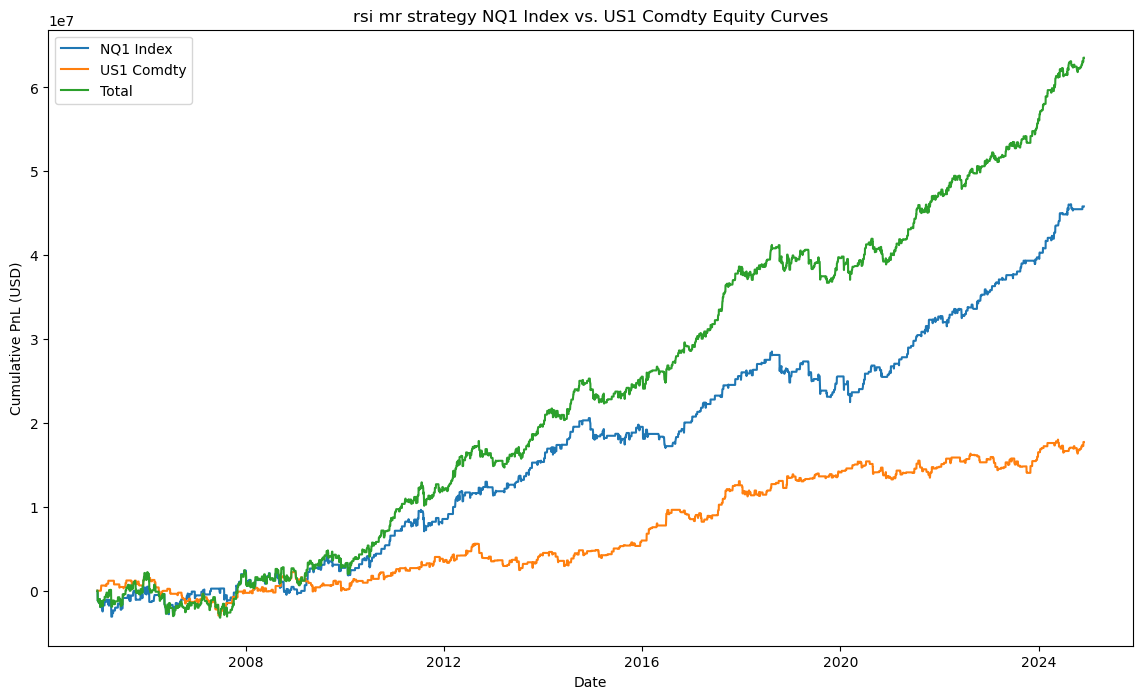

2024-11-29 11:30:56,720 - TradingRule_ratioMR_rsi_long_2f5ec7 - ERROR - Invalid file format for Matplotlib. Choose 'png' or 'svg'.


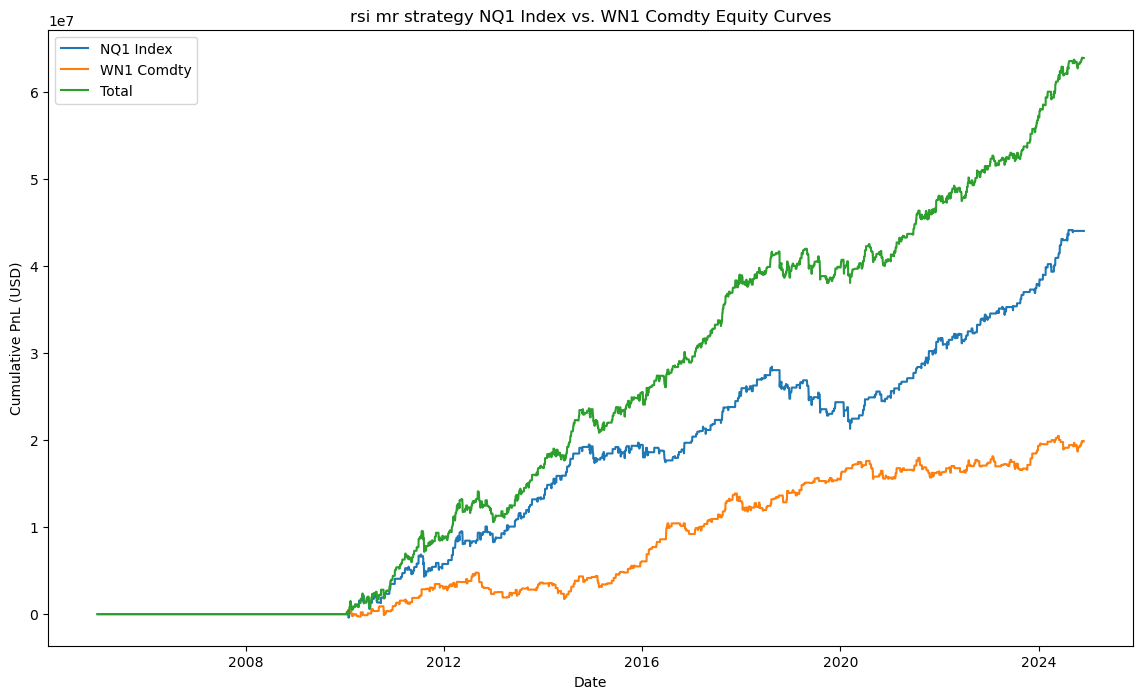

2024-11-29 11:30:57,872 - TradingRule_ratioMR_rsi_long_5f8a6d - ERROR - Invalid file format for Matplotlib. Choose 'png' or 'svg'.


,Average Ann. PnL,Average Ann. Vol,Sharpe Ratio (ann.),Sortino Ratio (ann.),Hit Rate (%),Profit Factor,Max drawdown,Average drawdown,Avg Drawdown Duration,Drawdowns per year
US1 Comdty,2.741850e+06,3.233185e+06,0.848034,0.657462,59.587956,1.382683,5920201.875,1.525030e+06,35.899281,5.762132
WN1 Comdty,4.293144e+06,3.087093e+06,1.390675,1.017338,64.195804,1.755577,3934944.375,9.704305e+05,24.385321,7.318945


In [55]:
### Where the magic happens

asst_main = 'NQ1 Index'

cmp_assts = market_data.get_asset_classes()['eq-us']
cmp_assts
cmp_assts = ['US1 Comdty', 'WN1 Comdty']


respnls = {}
results = {}
statsdf = {}
trules = {}




for asst in cmp_assts:
    
    pairs = [
        (asst_main, asst),
        (asst, asst_main)
    ]
    
    strategy_params2 = {
        'pairs': pairs,
        'N': (5, 2),
        'rsi_period': (3,3),
        'rsi_threshold': (10.0,8.0),
        'lmt_order': False,
        'lmt_day': 1,
        'lmt_day_only': True,
        'lmt_atr': -0.25,
        'lmt_epsilon': 0.1,
        'atr_period': 3,
        'atr_type': 'atr',
        'market_data': market_data,
        'risk_ratio': (1.0, 1.1)
        
    }

    tmp = TradingRule(
        market_data=market_data,
        trading_rule_function=ratioMR_rsi_long,
        trading_params=strategy_params2,
        position_sizing_params=pSizeParams,  # Define as needed
        incl_assets=[asst_main, asst],  # Include all involved assets
        name_label='TestMR_' + asst,
        strat_descr= f'rsi mr strategy {asst_main} vs. {asst}',
        log_level=logging.ERROR,
        bt_folder = bt_folder
    )

    res = tmp.backtest_all_assets(save=True)
    resdb = tmp.plot_equity(byassets=True, totalsys=True, start_date = '01012005', save_fig=True)
    stats = tmp.calculate_statistics(byassets=True, totalsys=True, start_date='01012001')
    statsdf[asst] = stats
    results[asst] = resdb
    respnls[asst] = res
    trules[asst] = tmp

# Extract the desired statistics from each dataframe in statsdf

required_columns = ['Average Ann. PnL', 'Average Ann. Vol', 'Sharpe Ratio (ann.)', 'Sortino Ratio (ann.)', 'Hit Rate (%)', 'Profit Factor', 
                    'Max drawdown', 'Average drawdown', 'Avg Drawdown Duration', 'Drawdowns per year', 'Max Drawdown Duration']
extracted_stats = {key: statsdf[key].loc['Total', [col for col in required_columns if col in statsdf[key].columns]] for key in statsdf.keys()}

# Convert the dictionary to a dataframe
extracted_stats_df = pd.DataFrame.from_dict(extracted_stats, orient='index')
extracted_stats_df.to_clipboard()
extracted_stats_df

In [56]:
testtr = trules['US1 Comdty']

testtr.perf_table(byac=False,byassets=True, table_detail='full')

,Period,2024,2023,2022,2021,2020,2019,2018,2017,2016,2015,...,1988,1987,1986,1985,1984,1983,1982,1981,1980,Total
AssetClass,Asset,,,,,,,,,,,,,,,,,,,,,
Unknown,Total,7301743.125,5008267.5,3767868.75,7865151.875,-52528.125,653591.25,1289110.0,8940641.875,3252635.625,1518508.125,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.948650e+07
eq-us,NQ1 Index,6073490.000,4150955.0,2903750.00,6546630.000,594100.000,-7990.00,409385.0,4905395.000,704795.000,296855.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.167066e+07
fi-us,US1 Comdty,1228253.125,857312.5,864118.75,1318521.875,-646628.125,661581.25,879725.0,4035246.875,2547840.625,1221653.125,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.781584e+07


In [57]:
res[0]['WN1 Comdty'].to_clipboard()

In [58]:
nq_pl = market_data.get_ticker_data('WN1 Comdty')
nq = nq_pl.to_pandas() 
nq.set_index('Date', inplace=True)

In [59]:
import plotly.graph_objects as go

# Extract the OHLC data for 'NQ1 Index'
nq_data = nq[['Open', 'High', 'Low', 'Close']]

# Create the OHLC plot
fig = go.Figure(data=[go.Ohlc(
    x=nq_data.index,
    open=nq_data['Open'],
    high=nq_data['High'],
    low=nq_data['Low'],
    close=nq_data['Close'],
    name='NQ1 Index'
)])

# Update layout for better visualization
fig.update_layout(
    title='NQ1 Index OHLC Chart',
    xaxis_title='Date',
    yaxis_title='Price',
    xaxis_rangeslider_visible=False
)

# Show the plot
fig.show()

In [60]:
mthlypnl = trules['WN1 Comdty'].strat_monthly_pnl(filter_assets=['WN1 Comdty'],save=True, name='WN monthlypnl.csv')
mthlypnl = trules['WN1 Comdty'].strat_monthly_pnl(filter_assets=['NQ1 Index'],save=True, name='NQ monthlypnl.csv')
mthlypnl = trules['WN1 Comdty'].strat_monthly_pnl(save=True, name='Strategy monthlypnl.csv')

In [61]:
mthlypnl

,1,2,3,4,5,6,7,8,9,10,11,12,Annual_PnL,Sharpe_Ratio,Annual_Vol,Hit_Rate,Profit_Factor,Worst_Drawdown
Year,,,,,,,,,,,,,,,,,,
1999,NaN,NaN,NaN,NaN,NaN,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN,0.000000e+00,0.000000,NaN,0.000
2000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN,0.000000e+00,NaN,NaN,0.000
2001,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN,0.000000e+00,NaN,NaN,0.000
2002,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN,0.000000e+00,NaN,NaN,0.000
2003,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN,0.000000e+00,NaN,NaN,0.000
2004,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN,0.000000e+00,NaN,NaN,0.000
2005,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN,0.000000e+00,NaN,NaN,0.000
2006,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN,0.000000e+00,NaN,NaN,0.000
2007,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN,0.000000e+00,NaN,NaN,0.000


In [62]:
statsdf = trules['WN1 Comdty'].calculate_statistics(byac=True, totalsys=True, start_date='01012000', save=True)

In [63]:
statsdf

,Total PnL,Average Ann. PnL,Average Ann. Vol,Sharpe Ratio (ann.),Sortino Ratio (ann.),Max drawdown,Average drawdown,Max drawdown Duration,Avg Drawdown Duration,Total Number of Drawdowns,...,Total PnL Losers,Profit Factor,PnL Skew,Trade EV,Best Trade,Worst Trade,25p Trade,50p Trade,75p Trade,Pareto Number (%)
Column,,,,,,,,,,,,,,,,,,,,,
fi-us,1.987394e+07,1.334461e+06,1.734495e+06,0.769366,0.414557,3022181.250,1.026399e+06,722,70.300000,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
eq-us,4.406324e+07,2.958683e+06,2.557982e+06,1.156648,0.624779,7158075.000,1.315966e+06,761,36.160000,75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total,6.393719e+07,4.293144e+06,3.087093e+06,1.390675,1.017338,3934944.375,9.704305e+05,300,24.385321,109,...,-8.462038e+07,1.755577,-0.863528,89422.637238,1238737.5,-1733640.0,-115946.875,140250.0,355905.0,10.20979


In [64]:
trades_list = trules['US1 Comdty'].tradeslist

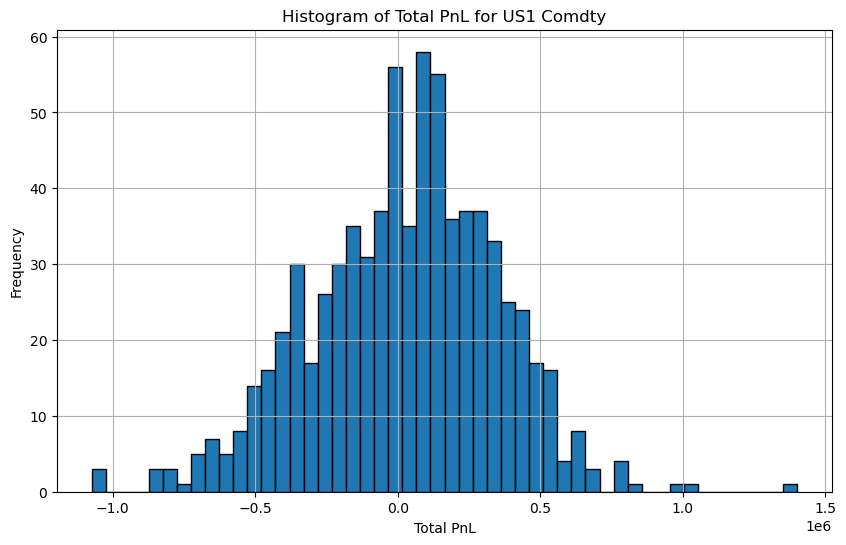

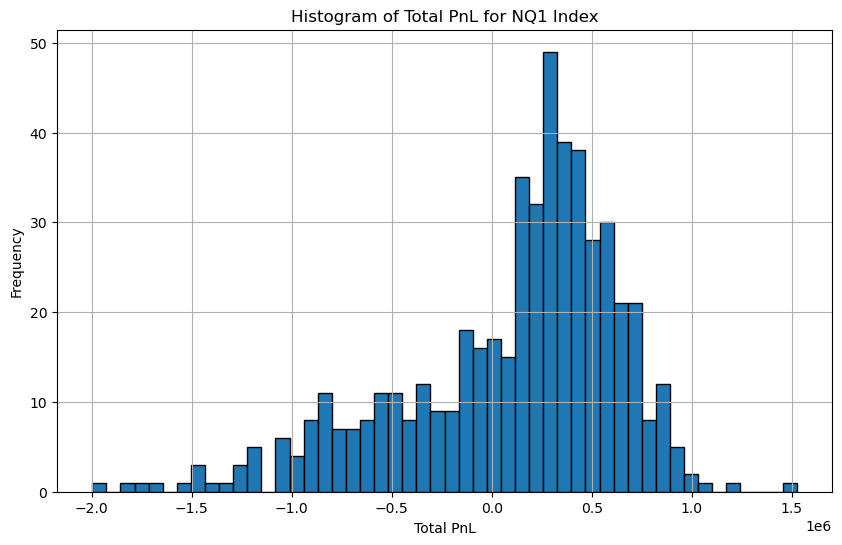

In [65]:
trades_list
import matplotlib.pyplot as plt
# Get unique assets from the trades list
unique_assets = trades_list['Asset'].unique()

# Plot histogram for each unique asset
for asset in unique_assets:
    asset_trades = trades_list[trades_list['Asset'] == asset]
    plt.figure(figsize=(10, 6))
    plt.hist(asset_trades['Trade_PnL'], bins=50, edgecolor='black')
    plt.title(f'Histogram of Total PnL for {asset}')
    plt.xlabel('Total PnL')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


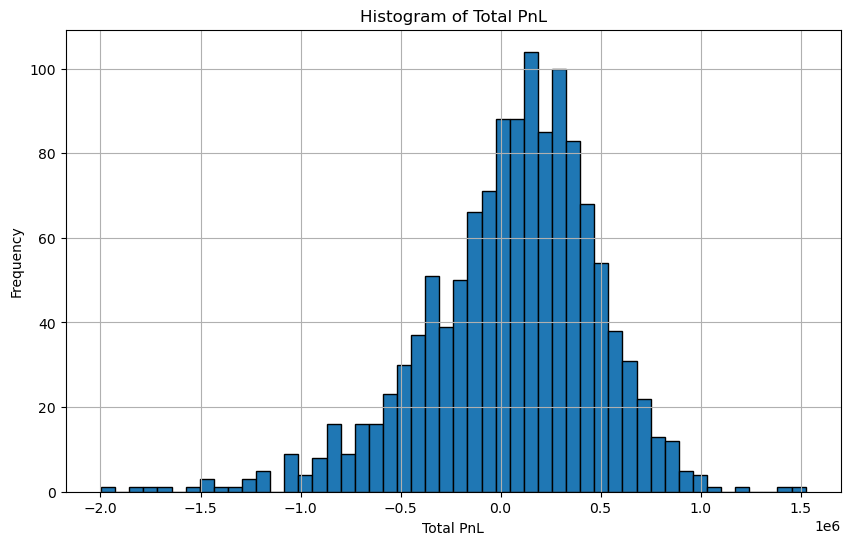

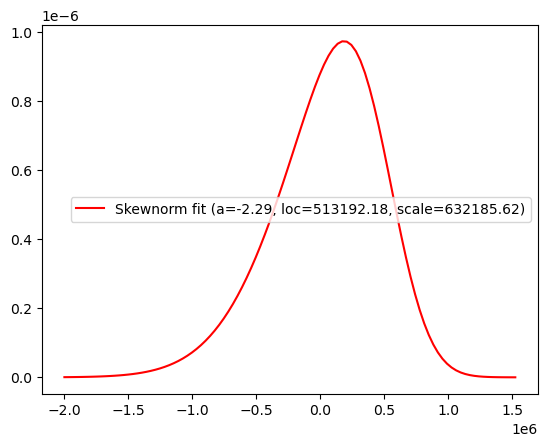

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, t, skewnorm

# Plot histogram of 'Total PnL' column
plt.figure(figsize=(10, 6))
plt.hist(trades_list['Trade_PnL'], bins=50, edgecolor='black')
plt.title('Histogram of Total PnL')
plt.xlabel('Total PnL')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Fit a skew normal distribution to the data
a, loc, scale = skewnorm.fit(trades_list['Trade_PnL'])

# Plot the fitted skew normal distribution
x = np.linspace(min(trades_list['Trade_PnL']), max(trades_list['Trade_PnL']), 100)
p = skewnorm.pdf(x, a, loc, scale)
plt.plot(x, p, 'r', label=f'Skewnorm fit (a={a:.2f}, loc={loc:.2f}, scale={scale:.2f})')
plt.legend()
plt.show()

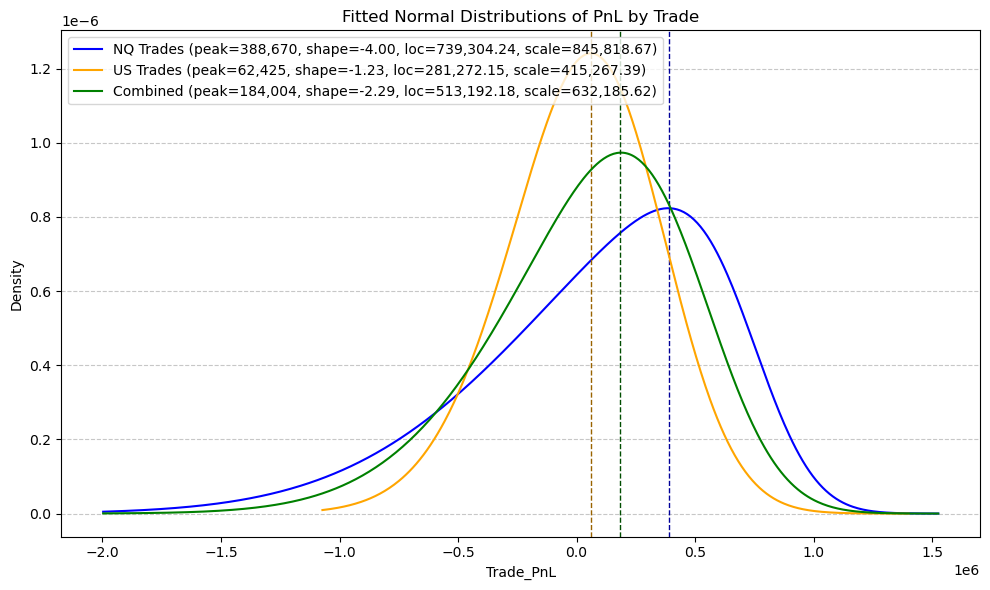

In [67]:
from matplotlib.ticker import FuncFormatter
from matplotlib.colors import to_rgba
from scipy.stats import skewnorm, t, norm
from scipy.optimize import minimize
from scipy.special import gamma
import numpy as np
import matplotlib.pyplot as plt

def ged_pdf(x, loc, scale, p):
    # Generalized Error Distribution PDF
    c = p / (2 * scale * gamma(1 / p))
    return c * np.exp(-np.abs((x - loc) / scale) ** p)
def fit_and_plot_dist(data, label, color, dist='skewnorm'):
    if dist == 'skewnorm':
        # Fit a skew-normal distribution to the data
        shape, loc, scale = skewnorm.fit(data)
        
        # Generate the fitted line
        x = np.linspace(min(data), max(data), 500)
        pdf_values = skewnorm.pdf(x, shape, loc, scale)
        peak = x[np.argmax(pdf_values)]  # True peak value
        
        # Plot the fitted line
        plt.plot(x, pdf_values, label=f'{label} (peak={peak:,.0f}, shape={shape:.2f}, loc={loc:,.2f}, scale={scale:,.2f})', color=color)
    
    elif dist == 'ged':
        # Define negative log-likelihood for GED
        def neg_log_likelihood(params):
            loc, scale, p = params
            if scale <= 0 or p <= 0:  # Constraints
                return np.inf
            return -np.sum(np.log(ged_pdf(data, loc, scale, p)))

        # Initial guesses for parameters
        initial_params = [np.mean(data), np.std(data), 1.5]
        bounds = [(None, None), (1e-5, None), (1e-5, None)]  # Enforce positive scale and p

        # Fit the parameters by minimizing the negative log-likelihood
        result = minimize(neg_log_likelihood, initial_params, bounds=bounds)
        loc, scale, p = result.x
        
        # Generate the fitted line
        x = np.linspace(min(data), max(data), 500)
        pdf_values = ged_pdf(x, loc, scale, p)
        peak = x[np.argmax(pdf_values)]  # True peak value
        
        # Plot the fitted line
        plt.plot(x, pdf_values, label=f'{label} (peak={peak:,.0f}, loc={loc:,.2f}, scale={scale:,.2f}, p={p:.2f})', color=color)

    elif dist == 't':
        # Fit a t-distribution to the data
        df, loc, scale = t.fit(data)
        
        # Generate the fitted line
        x = np.linspace(min(data), max(data), 500)
        pdf_values = t.pdf(x, df, loc, scale)
        peak = x[np.argmax(pdf_values)]  # True peak value
        
        # Plot the fitted line
        plt.plot(x, pdf_values, label=f'{label} (peak={peak:,.0f}, df={df:.2f}, loc={loc:,.2f}, scale={scale:,.2f})', color=color)

    else:
        # Fit a normal distribution to the data
        mu, std = norm.fit(data)
        
        # Generate the fitted line
        x = np.linspace(min(data), max(data), 500)
        pdf_values = norm.pdf(x, mu, std)
        peak = x[np.argmax(pdf_values)]  # True peak value
        
        # Plot the fitted line
        plt.plot(x, pdf_values, label=f'{label} (peak={peak:,.0f}, μ={mu:,.2f}, σ={std:,.2f})', color=color)
    
    # Add a vertical line at the peak
    darker_color = to_rgba(color, alpha=1.0)  # Get the RGBA value of the color
    darker_color = tuple(c * 0.6 for c in darker_color[:3]) + (1.0,)  # Make it darker
    plt.axvline(x=peak, color=darker_color, linestyle='--', linewidth=1)

us1 = trades_list[trades_list['Asset'] == 'US1 Comdty']['Trade_PnL']
nq1 = trades_list[trades_list['Asset'] == 'NQ1 Index']['Trade_PnL']
comb = trades_list['Trade_PnL']

# Plot the fitted lines
plt.figure(figsize=(10, 6))
fit_and_plot_dist(nq1, 'NQ Trades', 'blue', dist='skewnorm')
fit_and_plot_dist(us1, 'US Trades', 'orange', dist='skewnorm')
fit_and_plot_dist(comb, 'Combined', 'green', dist='skewnorm')

plt.title('Fitted Normal Distributions of PnL by Trade')
plt.xlabel('Trade_PnL')
plt.ylabel('Density')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
# Add titles and labels


In [69]:
trades_list.tail(10)

,Descr,AssetClass,Asset,FirstDate,LastDate,TradeEntry,TradeExit,USD_Notional,Num_Lots,Trade_PnL,Price_PnL,20d_Price_Vol,Std_PnL
Trade_ID,,,,,,,,,,,,,
2f5e_US1Com_736,US LONG BOND(CBT),fi-us,US1 Comdty,2024-10-07,2024-10-08,122.09375,121.46875,5.763079e+07,472.0,-301125.000,-0.62500,0.627861,-0.995443
2f5e_US1Com_737,US LONG BOND(CBT),fi-us,US1 Comdty,2024-10-11,2024-10-14,120.81250,120.15625,6.327674e+07,526.0,-351553.125,-0.65625,0.582456,-1.126694
2f5e_US1Com_738,US LONG BOND(CBT),fi-us,US1 Comdty,2024-10-15,2024-10-16,120.25000,121.18750,6.582159e+07,548.0,451687.500,0.93750,0.544133,1.722924
2f5e_US1Com_739,US LONG BOND(CBT),fi-us,US1 Comdty,2024-10-22,2024-10-23,118.62500,118.50000,5.216052e+07,439.0,-56787.500,-0.12500,0.748978,-0.166894
2f5e_US1Com_740,US LONG BOND(CBT),fi-us,US1 Comdty,2024-10-29,2024-10-30,117.78125,118.09375,5.689166e+07,483.0,155375.000,0.31250,0.748111,0.417719
2f5e_US1Com_741,US LONG BOND(CBT),fi-us,US1 Comdty,2024-11-08,2024-11-11,117.34375,118.00000,4.823665e+07,411.0,268537.500,0.65625,0.862187,0.761145
2f5e_US1Com_742,US LONG BOND(CBT),fi-us,US1 Comdty,2024-11-14,2024-11-15,116.12500,116.53125,4.874320e+07,420.0,169365.625,0.40625,0.846189,0.480094
2f5e_NQ1Ind_518,NASDAQ 100 E-MINI,eq-us,NQ1 Index,2024-11-18,2024-11-20,20504.00000,20762.25000,2.541225e+07,62.0,330450.000,258.25000,258.287076,0.999856
2f5e_US1Com_743,US LONG BOND(CBT),fi-us,US1 Comdty,2024-11-21,2024-11-22,116.62500,116.43750,5.352456e+07,459.0,-88481.250,-0.18750,0.780256,-0.240306


In [76]:
wnrule = trules['US1 Comdty']

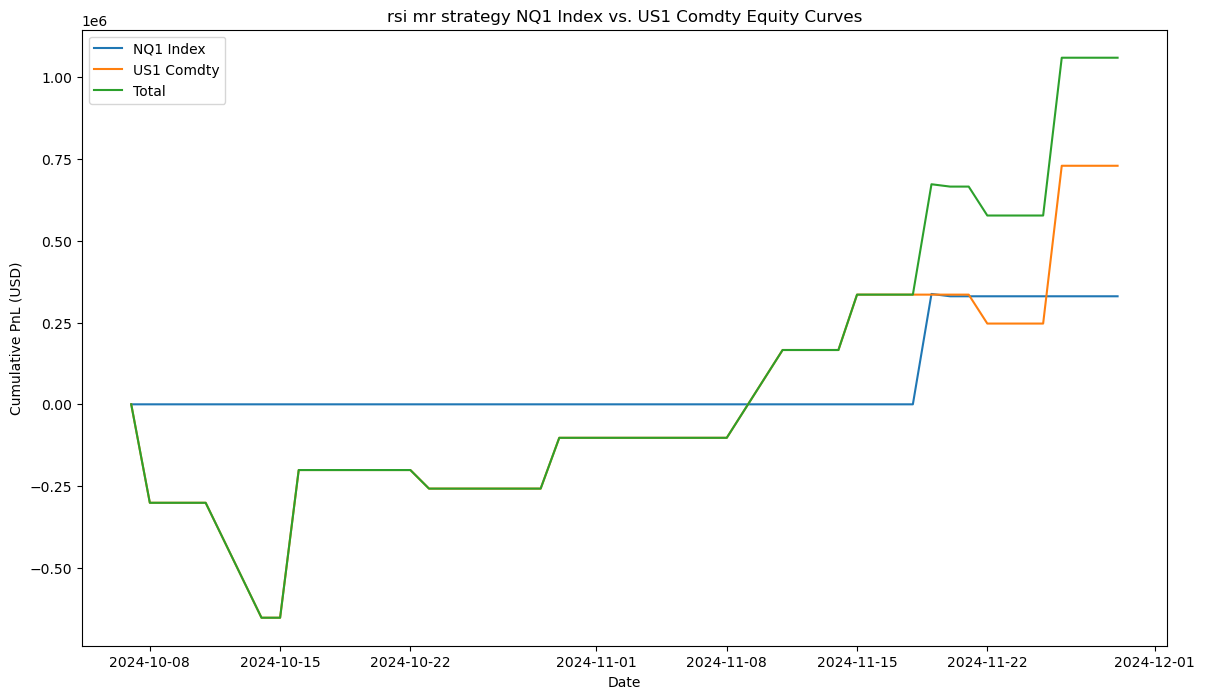

,NQ1 Index,US1 Comdty,Total
Date,,,
2024-10-07,0.0,0.000,0.000
2024-10-08,0.0,-301125.000,-301125.000
2024-10-09,0.0,-301125.000,-301125.000
2024-10-10,0.0,-301125.000,-301125.000
2024-10-11,0.0,-301125.000,-301125.000
2024-10-14,0.0,-652678.125,-652678.125
2024-10-15,0.0,-652678.125,-652678.125
2024-10-16,0.0,-200990.625,-200990.625
2024-10-17,0.0,-200990.625,-200990.625


In [77]:
wnrule.plot_equity(byassets=True, totalsys=True, start_date='07102024')